# Implementing a CNN network using Tensorflow models

**Import dependencies**

In [40]:
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

## Load data and define classes


In [41]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [42]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

**View data**

In [43]:
print(X_train.shape)
print(X_train[5])

(50000, 32, 32, 3)
[[[159 102 101]
  [150  91  95]
  [153  95  97]
  ...
  [ 91  71  56]
  [ 74  63  55]
  [ 76  58  55]]

 [[142  75  68]
  [146  72  66]
  [155  76  65]
  ...
  [127 105  71]
  [122 111  93]
  [ 86  69  61]]

 [[109  67  75]
  [ 99  58  60]
  [105  59  52]
  ...
  [137 112  80]
  [163 132 105]
  [ 93  72  71]]

 ...

 [[244 129  70]
  [240 123  65]
  [241 122  65]
  ...
  [156  42  15]
  [179  59  26]
  [200  73  36]]

 [[246 133  74]
  [243 128  72]
  [243 127  70]
  ...
  [162  44  14]
  [178  56  22]
  [192  65  27]]

 [[246 139  82]
  [243 133  78]
  [244 132  77]
  ...
  [166  47  14]
  [173  51  17]
  [182  57  19]]]


In [44]:
y_train[:2]

array([[6],
       [9]], dtype=uint8)

## Reshape/rescale data

In [45]:
# rescaling input values
X_train = X_train / 255
X_test  = X_test / 255

#reshape output to 1D array
y_train = y_train.reshape(-1,)
y_test  = y_test.reshape(-1,)

## Custom plot function

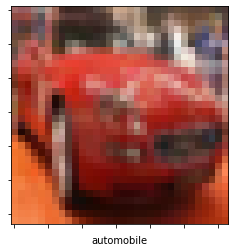

In [46]:
def plot(X, y, index):
    plt.figure(figsize = (4,4))
    plt.imshow(X[index])
    ax = plt.gca()
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    plt.xlabel(classes[y[index]])
plot(X_train, y_train, 5)

## Set up & train model

In [47]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=36, kernel_size=(4,4), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=72, kernel_size=(4,4), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # ann dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [48]:
cnn.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])

In [65]:
cnn.fit(X_train, y_train, epochs=35)

Epoch 1/35
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3729 - accuracy: 0.8664
Epoch 2/35
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3507 - accuracy: 0.8747
Epoch 3/35
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3401 - accuracy: 0.8767
Epoch 4/35
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3290 - accuracy: 0.8799
Epoch 5/35
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3139 - accuracy: 0.8877
Epoch 6/35
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3099 - accuracy: 0.8888
Epoch 7/35
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2906 - accuracy: 0.8937
Epoch 8/35
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2840 - accuracy: 0.8983
Epoch 9/35
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2746 - accuracy: 0.9009
Epoch 10/35
1563/1563 [==============================] - 5s 3ms/step - loss: 0.263

##Model Testing

In [66]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.73      0.68      1000
           1       0.76      0.80      0.78      1000
           2       0.52      0.56      0.54      1000
           3       0.51      0.46      0.49      1000
           4       0.62      0.60      0.61      1000
           5       0.61      0.50      0.55      1000
           6       0.68      0.76      0.71      1000
           7       0.72      0.70      0.71      1000
           8       0.76      0.72      0.74      1000
           9       0.74      0.74      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.65     10000
weighted avg       0.66      0.66      0.65     10000



## View results of trained model

**Get results**

In [67]:
y_pred = cnn.predict(X_test)
y_classes = [np.argmax(e) for e in y_pred]

**Pick index of image from test set**

In [88]:
idx = 797 # 0<= idx <= 9999 (size of test set of cifar10)

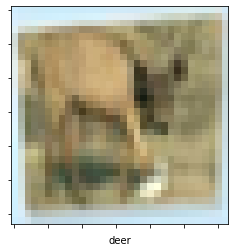

In [89]:
plot(X_test, y_test, idx)

**prediction**

In [90]:
classes[y_classes[idx]]

'deer'